In [3]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
# Load text files with categories as subfolder names.
raw_data = load_files(r'E:/training_lib_KTH', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']
# Randomly dividing the whole data into training (66.67%) and testing (33.33%) data 
train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=1/8, random_state=191)

# Taking ~25% of the training data for validation
valid_files = train_files[250:]
valid_targets = train_targets[250:]

# Remaining data will be used for training the model
train_files = train_files[:20]
train_targets = train_targets[:20]

# Generic details about the data

print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

Total number of videos: 300

Number of videos in training data: 20
Number of videos in validation data: 12
Number of videos in test data: 38


In [4]:
print(files)  # 打印所有文件名（eg.'E:/training_lib_KTH\\walking\\person19_walking_d2_uncomp.avi'）
print(targets)  # targets = raw_data['target'] :[0 1 2 3 4 5 ]类别被自动转换为数值
print(raw_data['target_names'])  # ['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

['E:/training_lib_KTH\\boxing\\person03_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person03_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d2_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person04_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d2_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person05_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d2_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d3_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person06_boxing_d4_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person07_boxing_d1_uncomp.avi'
 'E:/training_lib_KTH\\boxing\\person07_boxing_d2_uncomp.avi'
 'E:/tra

In [5]:
# Imports
import numpy as np
import time
from keras.utils import to_categorical
from utils import Videos

def load_frame(train_files, train_targets, valid_files, valid_targets, test_files,test_targets):
    # An object of the class `Videos` to load the data in the required format
    reader = Videos(target_size=(32, 32), 
                    to_gray=True, 
                    max_frames=200, 
                    extract_frames='middle', 
                    normalize_pixels=(0, 1))

    # Reading training videos and one-hot encoding the training labels
    X_train = reader.read_videos(train_files)
    y_train = to_categorical(train_targets, num_classes=6)
    print('Shape of training data:', X_train.shape)
    print('Shape of training labels:', y_train.shape)
    time.sleep(0.01)

    # Reading validation videos and one-hot encoding the validation labels
    X_valid = reader.read_videos(valid_files)
    y_valid = to_categorical(valid_targets, num_classes=6)
    print('Shape of validation data:', X_valid.shape)
    print('Shape of validation labels:', y_valid.shape)
    time.sleep(0.01)
    
    # Reading testing videos and one-hot encoding the testing labels
    X_test = reader.read_videos(test_files)
    y_test = to_categorical(test_targets, num_classes=6)
    print('Shape of testing data:', X_test.shape)
    print('Shape of testing labels:', y_test.shape)

    return (X_train, y_train, X_valid, y_valid, X_test,y_test)
#     return (X_train, y_train, X_valid, y_valid)

In [6]:
X_train, y_train, X_valid, y_valid, X_test,y_test = load_frame(train_files, train_targets, valid_files, valid_targets, test_files,test_targets)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.21it/s]


Shape of training data: (20, 200, 32, 32, 1)
Shape of training labels: (20, 6)


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.52it/s]


Shape of validation data: (12, 200, 32, 32, 1)
Shape of validation labels: (12, 6)


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:24<00:00,  1.44it/s]


Shape of testing data: (38, 200, 32, 32, 1)
Shape of testing labels: (38, 6)


In [7]:
print(type(X_train))
print(X_train.shape)
print(y_test)

<class 'numpy.ndarray'>
(20, 200, 32, 32, 1)
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [8]:
# define Model
from tensorflow.python.framework import ops
ops.reset_default_graph()

from keras import backend as K
K.clear_session()

from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Flatten, BatchNormalization
from keras.layers.core import Dense, Dropout
from keras import regularizers
from keras.layers import Input
import numpy as np

from keras.utils import plot_model

n_classes=6
nmodel=3


def create_3dcnn(X_train,n_classes):
   
    # Using the Sequential Model
    model = Sequential()

    # Adding Alternate convolutional and pooling layers
    model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                     input_shape=X_train.shape[1:]))
    # model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

    model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu'))
    # model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

    model.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
    # model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

   
    model.add(Flatten())
    # Hidden layer
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
    model.add(BatchNormalization())

    # Dropout Layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(6, activation='softmax'))

    model.summary()
#     plot_model(model, to_file="F://C3D_simple.png", show_shapes=True, show_layer_names=True)
    
    return model
    

In [9]:
create_3dcnn(X_train,n_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 67, 32, 32, 16)    448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 32, 32, 16)    64        
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 67, 16, 16, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 22, 14, 14, 64)    27712     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 14, 14, 64)    256       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 22, 7, 7, 64)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 8, 7, 7, 256)      442624    
__________

In [ ]:
# only used plot_model

from keras.layers import average
from keras.models import Model
from keras.utils import plot_model
# from keras.callbacks import ModelCheckpoint

import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt

from plot_history import plot_history

from keras import backend as K
K.clear_session()

def ensemble_model(X_train, n_classes=6, nmodel=2):
    models=[]
    for i in range(nmodel):
        print('model_{}:'.format(i))
        model_ = create_3dcnn(X_train,n_classes)
        models.append(model_)
        print('[INFO] finish create model_{}'.format(i))
        
        #append添加到列表最后面，通过model[-1]访问
        models[-1].compile(loss='categorical_crossentropy',
                      optimizer='adam', metrics=['accuracy'])


    model_inputs = [Input(shape=X_train.shape[1:]) for _ in range (nmodel)]   #定义了一个input层
    model_outputs = [models[i](model_inputs[i]) for i in range (nmodel)]   #所有model添加input，models[i](model_inputs[i])Keras API添加模型形式
    model_outputs = average(inputs=model_outputs)  #具体模型结构参考plot图像
    model = Model(inputs=model_inputs, outputs=model_outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
#     plot_model(model, to_file="F://C3D_ensemble_3.png", show_shapes=True, show_layer_names=True)
    
ensemble_model(X_train, n_classes=6, nmodel=3)

In [ ]:
from keras.layers import average
from keras.models import Model
from keras.utils import plot_model
# from keras.callbacks import ModelCheckpoint

import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt

from plot_history import plot_history

from keras import backend as K
K.clear_session()

def ensemble_model(X_train, n_classes=6, nmodel=2):
    models=[]
    for i in range(nmodel):
        print('model_{}:'.format(i))
        model_ = create_3dcnn(X_train,n_classes)
        models.append(model_)
        print('[INFO] finish create model_{}'.format(i))
        
        #append添加到列表最后面，通过model[-1]访问
        models[-1].compile(loss='categorical_crossentropy',
                      optimizer='adam', metrics=['accuracy'])
#         checkpoint = ModelCheckpoint(filepath='E://Model_Weights//Model_weights_ensemble_{}.best.hdf5'.format(i), save_best_only=True, verbose=1)

        # Training the model for 40 epochs
        history = models[-1].fit(X_train, y_train, batch_size=16, epochs=5, verbose=2,
                            validation_data=(X_valid, y_valid),  shuffle=True)
        
#         history = models[-1].fit(X_train, y_train, validation_data=(
#             X_test, Y_test), batch_size=args.batch, nb_epoch=args.epoch, verbose=1, shuffle=True)

#         plot_history(history , output, i)
        result_dir='F://'
        plt.plot(history.history['acc'], marker='.')
        plt.plot(history.history['val_acc'], marker='.')
        plt.title('model accuracy')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid()
        plt.legend(['acc', 'val_acc'], loc='lower right')
        plt.savefig(os.path.join(result_dir, 'model_{}_accuracy.png'.format(i)))
        plt.close()

        plt.plot(history.history['loss'], marker='.')
        plt.plot(history.history['val_loss'], marker='.')
        plt.title('model loss')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.grid()
        plt.legend(['loss', 'val_loss'], loc='upper right')
        plt.savefig(os.path.join(result_dir, 'model_{}_loss.png'.format(i)))
        plt.close()


    model_inputs = [Input(shape=X_train.shape[1:]) for _ in range (nmodel)]   #定义了一个input层
    model_outputs = [models[i](model_inputs[i]) for i in range (nmodel)]   #所有model添加input，models[i](model_inputs[i])Keras API添加模型形式
    model_outputs = average(inputs=model_outputs)  #具体模型结构参考plot图像
    model = Model(inputs=model_inputs, outputs=model_outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    output='E://Model_Weights'
    model_json=model.to_json()
    with open(os.path.join(output, 'ensemble_3dcnnmodel.json'), 'w') as json_file:
        json_file.write(model_json)
    model.save_weights(os.path.join(output, 'ensemble_3dcnnmodel.hd5'))
    
#     loss, acc=model.evaluate([X_test]*nmodel, Y_test, verbose=2)
#     with open(os.path.join(args.output, 'result.txt'), 'w') as f:
#         f.write('Test loss: {}\nTest accuracy:{}'.format(loss, acc))

#     print('merged model:')
#     print('Test loss:', loss)
#     print('Test accuracy:', acc)
    #model.summary()
    #plot_model(model, to_file="F://C3D_ensemble.png", show_shapes=True, show_layer_names=True)

In [1]:
ensemble_model(X_train, n_classes=6, nmodel=3)

NameError: name 'ensemble_model' is not defined

In [7]:
# 重新加载模型

# del model
# model reconstruction from JSON:
from keras.models import model_from_json
from keras.models import load_model


nmodel=3

#从JSON文件中加载模型
json_file = open('E:\\Model_Weights\\ensemble_3dcnnmodel.json', 'r')
model_json = json_file.read()
json_file.close()
 
new_model = model_from_json(model_json)
new_model.load_weights('E:\\Model_Weights\\ensemble_3dcnnmodel.hd5')
 
#编译模型
new_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
 
#评估加载之后的模型
loss, acc=new_model.evaluate([X_test]*nmodel, y_test, verbose=0)
# with open(os.path.join(args.output, 'result.txt'), 'w') as f:
#     f.write('Test loss: {}\nTest accuracy:{}'.format(loss, acc))

print('merged model:')
print('Test loss:', loss)
print('Test accuracy:', acc)



merged model:
Test loss: 4.575178748682926
Test accuracy: 0.21052631657374532


['SoccerJuggling.avi']


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.39s/it]


Shape of training data: (1, 10, 32, 32, 1)
after:  (1, 32, 32, 10, 1)


C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(activation="relu", batch_input_shape=[None, 32,..., data_format="channels_last", input_dtype="float32", bias_regularizer=None, use_bias=True, kernel_constraint=None, padding="same", kernel_regularizer=None, name="convolution3d_1", kernel_size=(3, 3, 3), bias_constraint=None, strides=[1, 1, 1], filters=32, kernel_initializer="glorot_uniform", activity_regularizer=None, trainable=True)`
  return cls(**config)
C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py:1109: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(activation="relu", data_format="channels_last", bias_regularizer=None, use_bias=True, kernel_constraint=None, padding="same", kernel_regularizer=None, name="convolution3d_2", kernel_size=(3, 3, 3), bias_constraint=None, filters=32, strides=[1, 1, 1], kernel_initializer="

predictions: [0.11271197 0.05828283 0.1516908  0.06739166 0.07793269 0.04127639
 0.03408469 0.39577597 0.03976038 0.02109262]
j: 7
SoccerJuggling: 39.58%


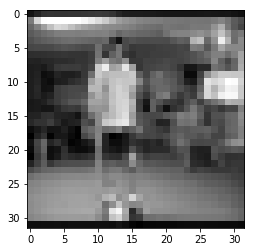

In [17]:
# Imports
import numpy as np
from keras.utils import to_categorical
from utils import Videos


train_files='SoccerJuggling.avi'

sample = [train_files]
print(sample)

# An object of the class `Videos` to load the data in the required format
reader = Videos(target_size=(32, 32), 
                to_gray=True, 
                max_frames=10, 
                extract_frames='middle', 
                normalize_pixels=(0, 1))

import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing
X_sample = reader.read_videos(sample)
# y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_sample.shape)
# print('Shape of training labels:', y_train.shape)
# Displaying the first frame of the first processed video from the training data
plt.imshow(np.squeeze(X_sample[0][0], axis=2), cmap='gray')


from keras.models import model_from_json
from keras.models import load_model


X = np.transpose(X_sample, ( 0, 2,3, 1,4))
print('after: ', X.shape)

# X = X_sample.reshape((X_sample.shape[0], 32, 32, 10, 1))


#从JSON文件中加载模型
json_file = open('E:\\ucf101_3dcnnmodel.json', 'r')
model_json = json_file.read()
json_file.close()
 
new_model = model_from_json(model_json)
new_model.load_weights('E:\\ucf101_3dcnnmodel.hd5')


classes=['BandMarching',
'CleanAndJerk',
'TennisSwing',
'FrisbeeCatch',
'TaiChi',
'HeadMassage',
'BoxingSpeedBag',
'SoccerJuggling',
'PlayingPiano',
'PlayingSitar',
]


predictions = new_model.predict([X],batch_size=1)[0]
print('predictions:', predictions)
j = predictions.argmax(axis=0)
print('j:', j)

label = classes[j]
proba = predictions[j] * 100

label = "{}: {:.2f}%".format(label, proba)
print(label)

# import cv2

# # train_files='boxing.avi'

# cap = cv2.VideoCapture(train_files)

# count = 0
# video_imgs = []

# predicted_label = 0
# classes = {}
# flag = False


# while True:

#     ret, img = cap.read()
#     if type(img) == type(None):
#         break
#     float_img = img.astype(np.float32)
#     video_imgs.append(float_img)
#     count += 1
#     if count == 10:

#         count = 0
#         video_imgs = []
#         flag = True

#     if flag:
#         label_color = (0, 0, 255)
#         cv2.putText(img, label, (10, 15),
#                     cv2.FONT_HERSHEY_TRIPLEX, 0.5, label_color,
#                     1, False)
#     cv2.namedWindow('video',cv2.WINDOW_NORMAL)
#     cv2.imshow('video', img)

#     if cv2.waitKey(33) == 27:
#         break

# cv2.destroyAllWindows()

## model.evaluate 用于评估您训练的模型。它的输出是准确度或损失，而不是对输入数据的预测。

## model.predict 实际预测，其输出是目标值，根据输入数据预测。

In [19]:
from sklearn.metrics import classification_report
import numpy as np


# 示例用法
# from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))

labelNames = ["0", "1", "2", "3", "4","5"]
# 评估模型
predictions = new_model.predict([X_test]*nmodel,batch_size=1)
print(predictions.argmax(axis=1))
print(y_test.argmax(axis=1))
# 模型结果
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=labelNames))


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[1 0 1 2 5 1 3 1 4 5 4 1 0 2 2 2 2 3 2 3 1 0 2 0 5 1 5 0 1 4 4 0 5 0 3 2 3
 3]


C:\Users\94009\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.00      0.00      0.00         8
          2       0.21      1.00      0.35         8
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00         4
          5       0.00      0.00      0.00         5

avg / total       0.04      0.21      0.07        38



In [ ]:
# voting ：Predict labels with models
labels = []
for m in models:
    predicts = np.argmax(m.predict(test), axis=1)
    labels.append(predicts)
    
# Ensemble with voting
labels = np.array(labels)
labels = np.transpose(labels, (1, 0))
# mode众数，出现次数最多的
labels = scipy.stats.mode(labels, axis=-1)[0]
labels = np.squeeze(labels)

In [18]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [27]:
# Voting Max

from keras.layers import average, add
from keras.models import Model
from keras.utils import plot_model


from keras import backend as K
K.clear_session()

def ensemble_model(X_train, n_classes=6, nmodel=3):
    models=[]
    for i in range(nmodel):
        print('model_{}:'.format(i))
        model_ = create_3dcnn(X_train,n_classes)
        models.append(model_)
        print('[INFO] finish create model_{}'.format(i))
        

    model_inputs = [Input(shape=X_train.shape[1:]) for _ in range (nmodel)]   #定义了一个input层
    model_outputs = [models[i](model_inputs[i]) for i in range (nmodel)]   #所有model添加input，models[i](model_inputs[i])Keras API添加模型形式
    model_outputs = add(inputs=model_outputs)  #具体模型结构参考plot图像
    model = Model(inputs=model_inputs, outputs=model_outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #model.summary()
    #plot_model(model, to_file="F://C3D_ensemble.png", show_shapes=True, show_layer_names=True)
    return model
model = ensemble_model(X_train, n_classes=6, nmodel=3)

def voting_max(model):
    # voting ：Predict labels with models
    labels = []    
    predicts = np.argmax(model.predict(test), axis=1)
    labels.append(predicts)

    # Ensemble with voting
    labels = np.array(labels)
    labels = np.transpose(labels, (1, 0))
    # mode众数，出现次数最多的
    # 有个问题，如果某个类别没有众数，此时该选取哪一个类别？？
    labels = scipy.stats.mode(labels, axis=-1)[0]
    labels = np.squeeze(labels)
    
    renturn labels

model_0:
[INFO] finish create model_0
model_1:
[INFO] finish create model_1


In [31]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 32, 32, 1 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10, 32, 32, 1 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 6)            734982      input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6)            734982      input_2[0][0]                    
__________________________________________________________________________________________________
average_1 